<a href="https://colab.research.google.com/github/helloeden/python-dashboard-panel/blob/main/Codebasics_senti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data processing packages
import pandas as pd
import numpy as np

#Visualization packages
import matplotlib.pyplot as plt

#NLP packages
# SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
from textblob import TextBlob
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [3]:
#disable warnings "A value is trying to be set on a copy of a slice from a DataFrame"
import warnings
warnings.filterwarnings("ignore")

In [4]:
# data = pd.read_csv('/content/codebasics_comments.csv',encoding='utf8',error_bad_lines=False)
data = pd.read_csv('/content/codebasics_comments.csv',encoding='utf8')
v_data = pd.read_csv('/content/codebasics_video_list.csv',encoding='utf8')

In [ ]:
data.info()

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': ['1','2','3','4','5','6']}, columns=['key', 'data'])
df

In [ ]:
df.groupby('key').sum()


In [ ]:
# Concatenate string with space from one column based on unique id

df.groupby('key').data.apply(' '.join)

key
A    1 4
B    2 5
C    3 6
Name: data, dtype: object

In [ ]:
df.groupby('key').data.apply(' '.join).reset_index()

key data
0   A  1 4
1   B  2 5
2   C  3 6

In [ ]:
len(set(data['video id']))

In [ ]:
len(set(v_data['Video ID']))


In [ ]:
v_data.info()

In [ ]:
v_data.head(5)

In [ ]:
v_data['Video ID'][1]

'Yt1Sw6yWjlw'

In [10]:
data.shape

(55591, 6)

In [ ]:
# def sentiment_analyse(text):
#     score = SentimentIntensityAnalyzer().polarity_scores(text)
#     # print(score)
#     if score['neg'] > score['pos']:
#         # print("Negative Sentiment")
#         score = score['neg']
#     elif score['neg'] < score['pos']:
#         # print("Positive Sentiment")
#         score = score['pos']
#     else:
#         # print("Neutral Sentiment")
#         score = score['neu']
#     return score

In [5]:
# Drop NA 
data.dropna(subset=['Comment', 'Time'], inplace= True)

In [10]:
# convert time datatype
data['Time'] = pd.to_datetime(data['Time'])

In [6]:
data['polarity'] = data['Comment'].apply(lambda x: round(TextBlob(x).sentiment.polarity, 2))
data['subjectivity'] = data['Comment'].apply(lambda x: round(TextBlob(x).sentiment.subjectivity, 2))
# data['nltk'] = data['Comment'].apply(lambda x: round(sentiment_analyse(x), 2))


In [7]:
from datetime import datetime

In [11]:
# data['weekdays'] = data['Time'].apply(lambda x: x.date().strftime("%M")) # this code will generate days by number
data['weekdays'] = data['Time'].apply(lambda x: x.date().strftime("%a"))

In [12]:
data['month']  = data['Time'].apply(lambda x: x.date().strftime("%b"))

In [13]:
data['year']  = data['Time'].apply(lambda x: x.date().strftime("%Y"))

In [ ]:
# new[["likes", "replay_count"]] = new[["likes", "replay_count"]].apply(pd.to_numeric) 
# new.info(memory_usage='deep')
# new.groupby('year')['video_id'].count() 
# new['weekday'] = new['time'].apply(lambda x: x.weekday()) 
# new['weekdays'] = new['time'].apply(lambda x: x.date().strftime("%A"))


In [14]:
# data['pol_cat']  = 0
# data.drop('pol_cat', axis=1, inplace=True)

#Adding the Sentiment Polarity column to the data
data['pol'] = data['polarity'].apply(lambda x: x)

In [15]:
# data['pol'][data.polarity == 0] = 0
# data['pol'][data.polarity > 0] = 1
# data['pol'][data.polarity < 0] = -1

In [16]:
data['pol'][data.polarity == 0] = 'Neutral'
data['pol'][data.polarity > 0] = 'Positive'
data['pol'][data.polarity < 0] = 'Negative'

In [17]:
df_positive = data[data.pol==1]
df_negative = data[data.pol==-1]
df_neutral = data[data.pol==0]

Positive    31968
Neutral     19733
Negative     3888
Name: pol, dtype: int64

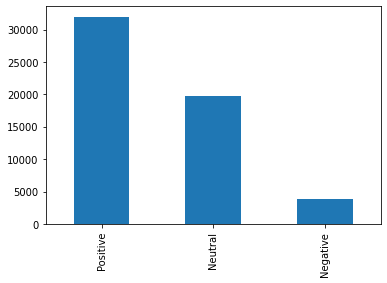

In [18]:
data.pol.value_counts().plot.bar()
data.pol.value_counts()

In [19]:
data.describe().T

count      mean        std  min  25%   50%   75%     max
Likes         55589.0  1.232546  18.880235  0.0  0.0  0.00  1.00  3003.0
Reply Count   36044.0  0.564172   1.881049  0.0  0.0  0.00  1.00   144.0
polarity      55589.0  0.227736   0.307871 -1.0  0.0  0.15  0.45     1.0
subjectivity  55589.0  0.391911   0.339110  0.0  0.0  0.39  0.63     1.0

In [ ]:
from plotly import graph_objs as go

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =data.pol,
    values = data.polarity,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))

In [23]:
data.groupby('pol').mean()['polarity']

pol
Negative   -0.219306
Neutral     0.000000
Positive    0.422680
Name: polarity, dtype: float64

In [24]:
data.pol.value_counts()

Positive    31968
Neutral     19733
Negative     3888
Name: pol, dtype: int64

In [ ]:
data.head(2)

In [ ]:
data.groupby(['weekdays', 'pol'])['polarity'].count()

In [ ]:
data.to_csv('/content/out.csv')

In [ ]:
s = set(data['video id'])
len(s)

In [22]:
import seaborn as sns

In [ ]:
data.info()

In [ ]:
v_data.head()

In [23]:
sns.set(rc = {'figure.figsize':(10,8)})
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [ ]:
v_data.info()

In [26]:
# convert time datatype
v_data['Date Published'] = pd.to_datetime(v_data['Date Published'])

In [27]:
v_data['weekdays'] = v_data['Date Published'].apply(lambda x: x.date().strftime("%a"))
v_data['month'] = v_data['Date Published'].apply(lambda x: x.date().strftime("%b"))
v_data['year'] = v_data['Date Published'].apply(lambda x: x.date().strftime("%Y"))

In [28]:
# v_data['video count'] = v_data['Video Title'].count()
v_data['video count'] = 1

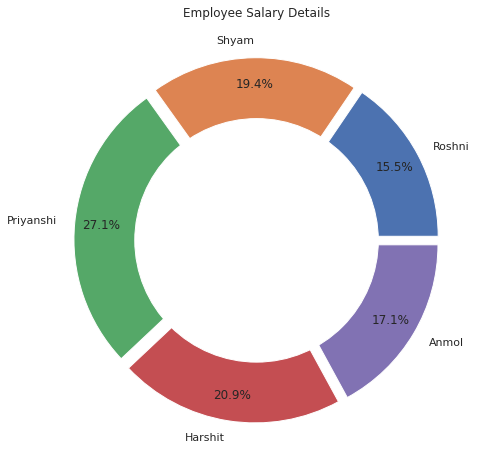

In [24]:
import matplotlib.pyplot as plt

# Setting labels for items in Chart
Employee = ['Roshni', 'Shyam', 'Priyanshi',
			'Harshit', 'Anmol']

# Setting size in Chart based on
# given values
Salary = [40000, 50000, 70000, 54000, 44000]

# colors
# colors = ['#FF0000', '#0000FF', '#FFFF00',
# 		'#ADFF2F', '#FFA500']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(Salary, labels=Employee,
		autopct='%1.1f%%', pctdistance=0.85,
		explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Employee Salary Details')

# Displaying Chart
plt.show()


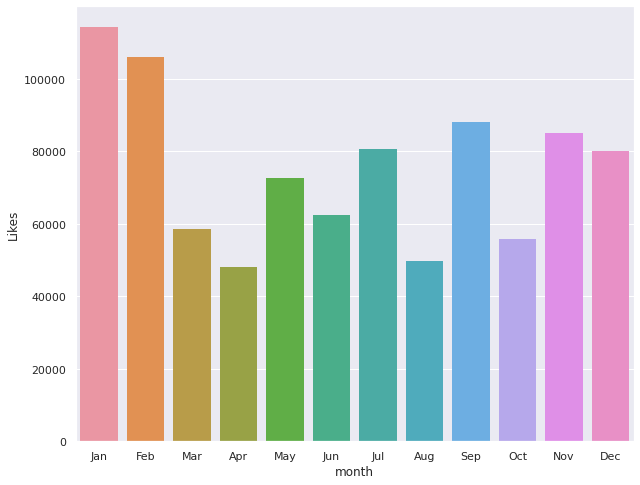

In [29]:

ax = sns.barplot(x='month', y='Likes', data = v_data, estimator = sum, ci=None, edgecolor = 'none', order=sort_order)


In [30]:
vw = v_data.groupby('weekdays').sum().reset_index()
vw['L/V'] = round((vw['Likes']/vw['video count']))

vw


weekdays     Views   Likes  Comments  video count     L/V
0      Fri   2554177   54667      4934           49  1116.0
1      Mon   3653327   79602      6236           50  1592.0
2      Sat  11906825  249506     17893          140  1782.0
3      Sun   9099750  188766     15154           99  1907.0
4      Thu   2299876   55317      3774           53  1044.0
5      Tue   4097803  105895      6617           54  1961.0
6      Wed   7260828  167734      9299           86  1950.0

In [31]:
vc = data.groupby('weekdays').sum().reset_index()
vc


weekdays  Likes  Reply Count  polarity  subjectivity
0      Fri  11169       2782.0   1770.65       2960.67
1      Mon   8104       2619.0   1784.63       3074.31
2      Sat  10420       3361.0   1799.42       3133.82
3      Sun   8608       3023.0   1688.27       2995.04
4      Thu  12270       2756.0   1814.72       3046.66
5      Tue   7945       2827.0   1882.07       3289.92
6      Wed  10000       2967.0   1919.83       3285.52

In [32]:
# Pie Chart
plt.pie(vw['Views'], labels=vw['weekdays'],
		autopct='%1.1f%%', pctdistance=0.85, startangle = 180)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()

# Adding Circle in Pie char
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('% views by Weekdays')

# plt.setp(autotexts, size = 8, weight ="bold")

# Displaying Chart
plt.show()

In [33]:
sort_w = set(v_data['weekdays'])
sort_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
s_week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [34]:
ax = sns.barplot(x='weekdays', y='Likes', data = vw, ci=None, edgecolor = 'none', order=s_week)


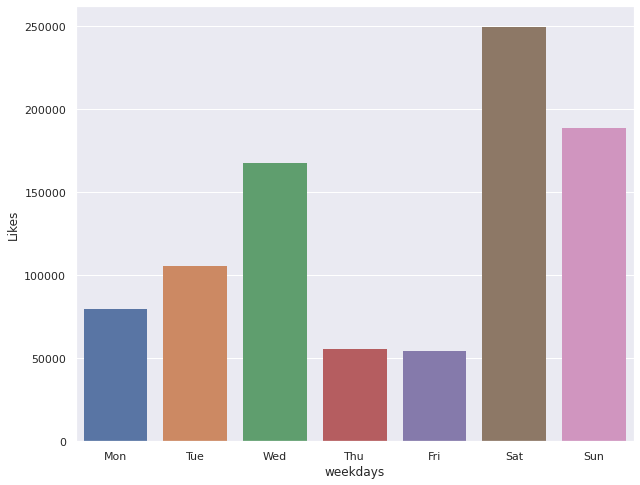

In [35]:
ax1 = sns.barplot(x='weekdays', y= 'Likes', data = v_data, estimator = sum, edgecolor = 'none', ci=None, order=s_week)

In [36]:
ax1 = sns.barplot(x='weekdays', y='video count', data = v_data, estimator = sum, edgecolor = 'none', ci=None, order=s_week)

['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


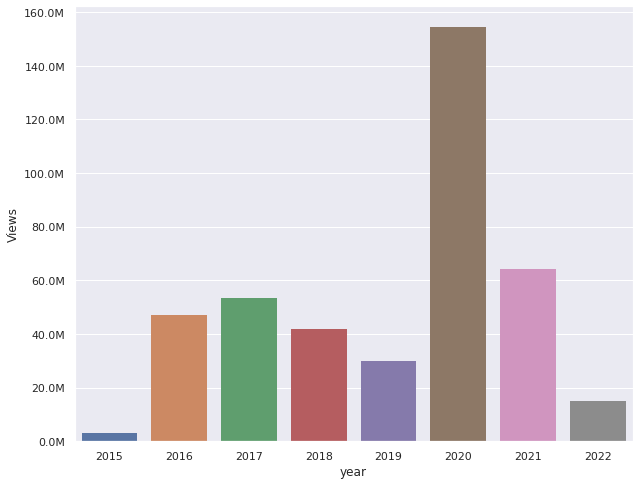

In [37]:
sort_y = set(v_data['year'])
print(sorted(sort_y))
ax2 = sns.barplot(x='year', y='Views', data = v_data, estimator=sum, edgecolor = 'none', ci=None, order = sorted(sort_y))
ylabels = ['{:,.1f}'.format(x) + 'M' for x in ax2.get_yticks()/100000]
ax2.set_yticklabels(ylabels)
ax2

In [ ]:
!pip install pywedge

In [ ]:
import pywedge as pw

In [ ]:
mc = pw.Pywedge_Charts(data, c=None, y='polarity')

In [ ]:
mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [38]:
data.count()

Name            55587
Comment         55589
Time            55589
Likes           55589
Reply Count     36044
video id        55589
polarity        55589
subjectivity    55589
weekdays        55589
month           55589
year            55589
pol             55589
dtype: int64

In [39]:
set_comments = set(data['Comment'])
len(set_comments)

48646

In [40]:
all_comment = data['Comment']
len(all_comment)

55589

In [41]:
dupes = []
seen = []

for x in all_comment:
    if x in seen:
        dupes.append(x)
    else:
        seen.append(x)

In [113]:
print(len(dupes), len(seen))

6943 48646


In [ ]:
set(dupes)

In [ ]:
# dropping ALL duplicate values
data.drop_duplicates(subset ="Comment", keep = False, inplace = True)

In [48]:
data.count()

Name            55587
Comment         55589
Time            55589
Likes           55589
Reply Count     36044
video id        55589
polarity        55589
subjectivity    55589
weekdays        55589
month           55589
year            55589
pol             55589
dtype: int64

In [49]:
###  extract all comments by video in a new column
new_data = data.groupby(['video id'])['Comment'].apply(', '.join).reset_index()

In [ ]:
new_data.head(10)

In [ ]:
def clean_comments(dataframe: data) -> data:
    # logger.info("Cleaning data for analysis...")

    dataframe["Cleaned Comment Text"] = (
        dataframe["Comment"]
        # remove whitespace
        .str.strip()
        # replace newlines with space
        .str.replace("\n", " ")
        # remove mentions and links
        .str.replace(r"(?:\@|http?\://|https?\://|www)\S+", " ", regex=True)
        # remove punctuations, emojis, special characters
        .str.replace(r"[^\w\s]+", " ", regex=True)
        # turn to lowercase
        .str.lower()
        # remove numbers
        .str.replace(r"\d+", " ", regex=True)
        # remove hashtags
        .str.replace(r"#\S+", " ", regex=True)
    )

    # remove stop words
    stop_words = stopwords.words("english")
    dataframe["Comment Text"] = dataframe["Cleaned Comment Text"].apply(
        lambda comment: " ".join([word for word in comment.split() if word not in stop_words])
    )

    return dataframe

In [42]:
from nltk.corpus import stopwords

In [ ]:
clean_comments(data)

In [ ]:
data

# New Section

In [73]:
import re
import string
def clean_text(text):
    # #will replace the html characters with " "
    # text=re.sub('<.*?>', ' ', text)  
    #To remove the punctuations
    # text = text.translate(str.maketrans(' ',' ',string.punctuation))
    #will consider only alphabets and numerics
    # text = re.sub('[^a-zA-Z]',' ',text)
    # text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ', text)
    # text = re.sub("(@[A-Za-z0-9_]+)"," ", text)
    #will replace newline with space
    text = re.sub("\n"," ",text)
    text = re.sub("\'", "'", text)
    #will convert to lower case
    text = text.lower()
    # Remove white spaces
    text = text.strip()
    # will split and join the words
    text=' '.join(text.split())
    return text

In [44]:
def removes_stop(text):
  stop = stopwords.words('english')
  # text = "my package from amazon never arrived fix this asap"
  text = ' '.join([word for word in text.split() if word not in (stop)])

  print(text)

  return text


In [48]:
new = data

In [ ]:
# dropping ALL duplicate values
new.drop_duplicates(subset ="Comment", keep = False, inplace = True)

In [49]:
new['clean'] = (new['Comment']).apply(lambda x: clean_text(x))


In [ ]:
new.head(1)

In [ ]:
# Next apply the removes_stop function to the text
new['stop'] = (new['clean']).apply(lambda x: removes_stop(x))

In [ ]:
pip install googletrans==3.1.0a0

In [55]:
from googletrans import Translator


In [101]:
translator = Translator()
# translate a spanish text to english text (by default)
translation = translator.translate("Hola Mundo")
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")

Hola Mundo (es) --> Hello World (en)


In [ ]:
new

In [ ]:
new['clean']

In [ ]:
new.drop('Comment', axis=1)

In [ ]:
new.to_csv('/content/new.csv', encoding='utf-8')

In [51]:
new['com_pol'] = new['Comment'].apply(lambda x: round(TextBlob(x).sentiment.polarity, 2))
new['clean_pol'] =new['clean'].apply(lambda x: round(TextBlob(x).sentiment.polarity, 2))
new['stop_pol'] =new['stop'].apply(lambda x: round(TextBlob(x).sentiment.polarity, 2))

In [ ]:
new_data = data.groupby('video id').count()

In [ ]:
new_data.drop(['Name', 'n', 'Time', 'new_polarity'], axis=1)

In [ ]:
new_data['like_comments'] = data.groupby('video id').sum()['Likes']

In [ ]:
new_data['all_comments'] = data.groupby('video id')['Comment'].apply(list)

In [ ]:
new_data['list_comments'] = data.groupby(['video id']).agg({'Comment': ' '.join})

In [ ]:
new_data['lamda_comments'] = data.groupby('video id')['Comment'].apply(lambda x: ','.join(x))

In [ ]:
type(new_data['all_comments'])

pandas.core.series.Series

In [ ]:
new_data.head()

In [ ]:
new_data.drop('Reply Count', axis=1)

In [ ]:
new_data.to_csv('/content/new.data.csv')

In [ ]:
new_data

In [ ]:
sns.histplot(x="stop_pol", data=new)

In [53]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html

sns.violinplot(x='stop_pol',data=new)

In [54]:
sns.boxplot(x='stop_pol',data=new)

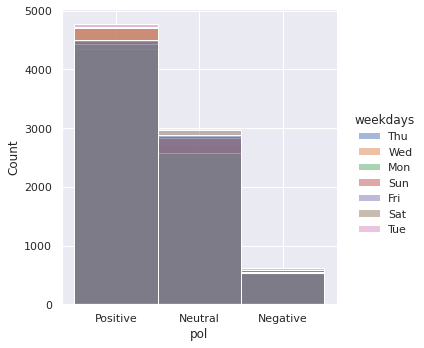

In [55]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.displot(data, x="pol", hue="weekdays")

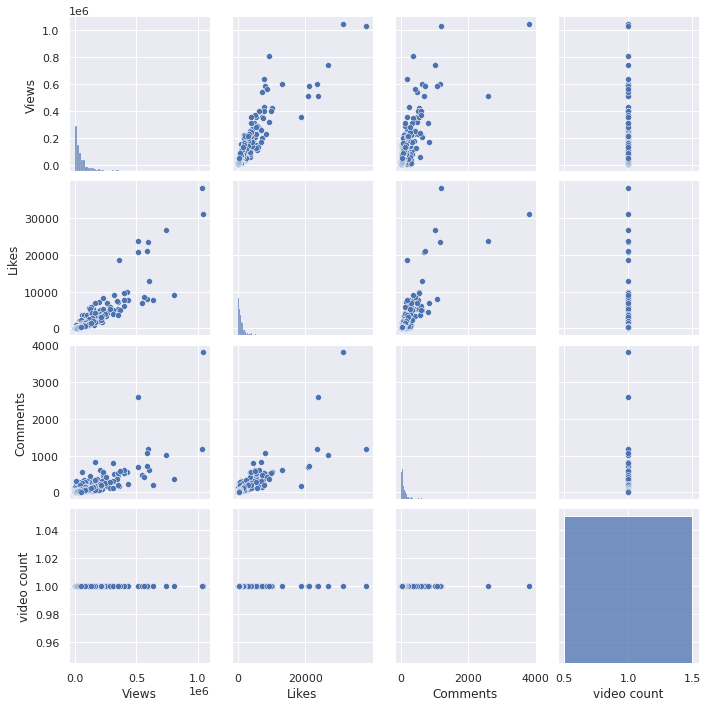

In [56]:
sns.pairplot(v_data)

In [ ]:
one_id = data[data['video id']=='18I7bYe-e3o']
com = one_id['Comment']
type(com)
tex = []
for x in com:
  tex.append(tex)
s = str(com.values)
type(s)
w = TextBlob(s)
print(w.words)
type(s)
w.sentiment

In [ ]:
nltk.download('punkt')

In [ ]:
one_id = new[new['video id']=='18I7bYe-e3o']
com = one_id['Comment']
type(com)
tex = []
for x in com:
  tex.append(tex)
s = str(com.values)
w = TextBlob(s)
print(w.words)
type(s)
w.sentiment

In [ ]:
type(data)

In [ ]:
type(com)

In [ ]:
list(com)

In [ ]:
text = []

for x in com:
  text.append(x)

In [ ]:
type(text)

In [ ]:
list_com = ''.join(text)

In [ ]:
type(list_com)

str

In [ ]:
TextBlob(list_com).sentiment.polarity

In [ ]:
one_id['polarity'].mean()

In [ ]:
len(text)

In [ ]:
one_id['polarity'].count()

In [ ]:
ind = new_data.filter(items = ['1Rs5Kml8qMM'], axis=0)

NameError: ignored

In [ ]:
l = ind['string'].astype(str)

In [ ]:
new_data["Name"]= new_data["list_comments"].astype(str)

In [ ]:
new_data["string"]= new_data["all_comments"].str.join('.')

In [ ]:
new_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, -jix4KyxLuQ to xNMYz74zNHM
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Name          92 non-null     int64
 1   Comment       92 non-null     int64
 2   Time          92 non-null     int64
 3   Likes         92 non-null     int64
 4   Reply Count   92 non-null     int64
 5   polarity      92 non-null     int64
 6   subjectivity  92 non-null     int64
 7   weekdays      92 non-null     int64
 8   month         92 non-null     int64
 9   year          92 non-null     int64
 10  pol           92 non-null     int64
dtypes: int64(11)
memory usage: 8.6+ KB


In [ ]:
l=[]
for x in ind['list_comments']:
  l.append(x)

In [ ]:
m = '.'.join(l)

In [ ]:
type(l)

pandas.core.series.Series

In [ ]:
TextBlob(l).sentiment.polarity

In [ ]:
new_data.to_csv('/content/new.csv')

In [ ]:
new_data.to_json('/content/new.json')

In [ ]:
#next = data.groupby(by='video id', as_index=False).count()
next = data.groupby(by='video id').count()


In [ ]:
next.drop(['weekdays', 'month', 'year'], axis=1, inplace=True)


In [ ]:
next['all_comments'] = data.groupby(['video id']).agg({'Comment': '.'.join})


In [ ]:
next['all_comments'] = data.groupby('video id')['Comment'].apply(list)

In [73]:
import pandas as pd
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy

In [ ]:
def clean(text):
  t = []
  for x in text:
    t.append(x)
  u = '. '.join(t)
  return u

In [ ]:
data['new_polarity'] = data['n'].apply(lambda x: round(TextBlob(x).sentiment.polarity, 2))

In [ ]:
next.to_csv('/content/new.csv')

In [ ]:
ind = next.filter(items = ['1Rs5Kml8qMM'], axis=0)

In [ ]:
t = ind['all_comments']
type(t)
for x in t:
  print(x)

In [ ]:
next['all_comments'].to_csv('/content/data.txt')

In [ ]:
next
#del new_data

In [ ]:
#generate some psuedo data
df = pd.DataFrame({'num':[50000, 75000, 100000, 125000], 'Rent/Sqft':np.random.randn(4), 'Region':list('abcd')})
df

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")    
fig, ax = plt.subplots(figsize=(8, 5))    
palette = sns.color_palette("bright", 4)
g = sns.scatterplot(ax=ax, x="num", y="Rent/Sqft", hue="Region", marker='o', data=df, s=100, palette= palette)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
g.set(xlim = (50000,250000))
xlabels = ['{:,.2f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

In [ ]:
# dropping ALL duplicate values
next.drop_duplicates(subset ="Comment", keep = False, inplace = True)

In [ ]:
next.head(1)

In [111]:
seen = []
dupes = []

for x in clean_all_comments:
    if x in seen:
        dupes.append(x)
    else:
        seen.append(x)

In [124]:
import re

In [114]:
def clean_text(text):
    #will replace newline with space
    text = re.sub("\n"," ", text)
    #will consider only alphabets and numerics
    text = re.sub('[^A-Za-z0-9]',' ',text)

    text = re.sub(" u "," you ", text)
    text = re.sub("\r"," are ", text)
    text = re.sub(" t ","'t ", text)
    # #will replace the html characters with " "
    # text=re.sub('<.*?>', ' ', text)  
    #To remove the punctuations
    # text = text.translate(str.maketrans(' ',' ',string.punctuation))
    # text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ', text)
    #will convert to lower case
    text = text.lower()
    # Remove white spaces
    text = text.strip()
    # will split and join the words
    text=' '.join(text.split())
    return text

In [112]:
dups_t = []
for t in dupes:
  dups_t.append(clean_text(t))


In [ ]:
dups_t

In [161]:
clean_dups = []

In [162]:
# a = "do you want to learn technology from me check https codebasics io for my affordable video courses"
b =  "congratulations you have been selected among one of my lucky winners today dm to claim your prize"
c =  "thanks for the feedback expect more video very soon send a directiy message i have something for you"
d = ""
# e = 'do you want to learn technology from me codebasics io is my website for video courses first course going live in the last week of may'
f =  'sir i need a video on your journey pls i m doing data scientist course',
# g = 'do you want to learn technology from me check https codebasics io utm source pin comment utm medium yt utm campaign pin comment utm id youtube for my affordable video courses'
h = 'do you want to learn technology'
for t in dups_t:
  # if t == a or t==b or t == c or t == d or t == e or t == f or t == g:
  if t==b or t == c or t == d or t == f or h in t:
    pass
  else:
    clean_dups.append(t)

In [ ]:
clean_dups

In [60]:
clean_all_comments = []

In [61]:
for t in all_comment:
  clean_all_comments.append(clean_text(t))

In [62]:
new_clean_all_comments = []

In [64]:
# a = "do you want to learn technology from me check https codebasics io for my affordable video courses"
b =  "congratulations you have been selected among one of my lucky winners today dm to claim your prize"
c =  "thanks for the feedback expect more video very soon send a directiy message i have something for you"
d = ""
# e = 'do you want to learn technology from me codebasics io is my website for video courses first course going live in the last week of may'
f =  'sir i need a video on your journey pls i m doing data scientist course',
# g = 'do you want to learn technology from me check https codebasics io utm source pin comment utm medium yt utm campaign pin comment utm id youtube for my affordable video courses'
h = 'do you want to learn technology'
for t in clean_all_comments:
  # if t == a or t==b or t == c or t == d or t == e or t == f or t == g:
  if t==b or t == c or t == d or t == f or h in t:
    pass
  else:
    new_clean_all_comments.append(t)


In [ ]:
clean_dups

In [135]:
translator = Translator()
# translate a spanish text to english text (by default)
trans = translator.translate("Hola Mundo")
print(f"{trans.origin} ({trans.src}) --> {trans.text} ({trans.dest})")

Hola Mundo (es) --> Hello World (en)


In [124]:
type(trans.text)

str

In [152]:
testing = [
 'sir last year ego my pc hacked gujd ransomwer please huw to get back my data help mee please',
'Ami vat khabo',
 'ye keya hain',
 'tum mujhe batao do',
 'keya nam hain tumhara']


In [65]:
cloud = ''

for x in new_clean_all_comments:
  # translation = translator.translate(x)
  cloud+=str(x)
  cloud+='. '


In [76]:
cloud

In [95]:
new_cloud = clean_text(cloud)

In [115]:
clean_t = clean_text(cloud)
#open text file
text_file = open("/content/data.txt", "w")
#write string to file
n = text_file.write(clean_t)
#close file
text_file.close()

clean_t

"mrs charlotte is legit and her method works like magic i keep on earning every single week with her new strategies i have done a similar project on google datastudio but i have used both the map as well as the horizontal bar graph and it looks pretty cool sir please provide us big data engineer and data science course have a look at numpy pandas and matplotlib and machine learning courses data science is almost covered in all these topics i not able make my github portfolio is it that hard hi sir i m bsc stats student present i m studying final year after completion of my study it it good to choose data analyst or else any other job course hlo i have just completed my school this year and i want to become an data scientist what path should i follow how can i learn is college necessary sir plz make vedio on how to use discord have joint once but didn't understand how it s works thank you tanjila hello sir i am graduation appeared and now not able to complete due to some family issues b

In [ ]:
clean_r = removes_stop(clean_t)

In [ ]:
pip install wordcloud

In [83]:
# Import package
from wordcloud import WordCloud, STOPWORDS



In [116]:
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, max_words=200, random_state=1, background_color='gray', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(clean_t)


In [117]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(clean_r)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:50])



[('thank', 12070), ('sir', 9001), ('video', 8729), ('data', 8437), ('please', 4820), ('much', 3399), ('good', 3310), ('python', 3185), ('great', 3176), ('learning', 2998), ('one', 2974), ('make', 2644), ('help', 2640), ('helpful', 2640), ('science', 2604), ('glad', 2498), ('job', 2453), ('codebasic', 2451), ('learn', 2448), ('use', 2383), ('really', 2370), ('tutorial', 2336), ('work', 2270), ('time', 2156), ('best', 2092), ('want', 2041), ('lot', 2024), ('know', 2000), ('need', 1991), ('code', 1896), ('project', 1858), ('course', 1820), ('model', 1782), ('using', 1766), ('explanation', 1754), ('got', 1723), ('way', 1695), ('ye', 1656), ('value', 1625), ('error', 1608), ('hi', 1530), ('c', 1494), ('year', 1493), ('analyst', 1461), ('file', 1400), ('self', 1396), ('x', 1377), ('u', 1325), ('question', 1287), ('many', 1256)]


In [118]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [119]:
plot_cloud(wordcloud)